<a href="https://colab.research.google.com/github/namratagawade/demo-git-hub2/blob/main/Project_2_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Import libraries 

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

%matplotlib inline 

In [11]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#I'm going to join the train & Test Data in order to do the same transformations. 
df_housing=pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

#keeping the number of elements in the train dataframe. 
TRAIN_ELEMENTS_INDEX = df_train.index.max()

df_train.shape, df_test.shape, df_housing.shape

((1460, 81), (1459, 80), (2919, 81))

In [12]:
##Just a quick look to our data. 
df_housing.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [13]:
#check the number of elements in each unique value in the columns. c
COLS_TO_CHECK = ['Street', 'Utilities', 'Condition2', 
                'LandSlope', 'RoofMatl', 'ExterCond', 'Heating', 
                'CentralAir', 'GarageCond', 'Electrical']

#I create a DataFrame where store the Data
dftemp = pd.DataFrame(columns=['col_name', 'value', 'count'])

#In every colum to check I get the values and number of them, 
#and store in the DataFrame
for ctc in COLS_TO_CHECK: 
    dcol = df_housing[ctc].value_counts()
     for i in range(len(dcol)):
        row = {'col_name': ctc, 
              'value': dcol.index[i], 
              'count': dcol[i]}
        df_row = pd.DataFrame([row])
        dftemp = pd.concat([dftemp, df_row], axis=0, ignore_index=True)

IndentationError: ignored

In [14]:
#A list of all the values, it's easy to identify some that we can drop. 
dftemp

NameError: ignored

In [15]:
df_housing.drop(['Street', 'Utilities'], axis=1, inplace=True)

In [16]:
#change the ppandas visualization options to view all columns an rows if necessary. 
pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); 
df_housing.shape

(2919, 79)

In [17]:
df_housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [19]:
#Get the numbers of Null values in columns, in descending order. 
df_housing.isna().sum().sort_values(ascending=False).head(40)
                                                      

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
BsmtFullBath        2
Functional          2
BsmtFinSF2          1
SaleType            1
BsmtUnfSF           1
Electrical          1
BsmtFinSF1          1
TotalBsmtSF         1
GarageCars          1
GarageArea          1
KitchenQual         1
Exterior2nd         1
Exterior1st         1
Fireplaces          0
SaleCondition       0
TotRmsAbvGrd        0
PavedDrive          0
YrSold              0
WoodDeckSF          0
dtype: int64

In [20]:
df_house_clean = df_housing.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley'], axis=1)

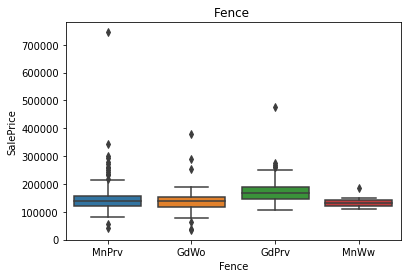

In [21]:
plt.title('Fence ')
#Note that I'm getting only the Train part of the Dataframe, the test have no SalePrice
sns.boxplot(x='Fence', y='SalePrice', data=df_house_clean[:TRAIN_ELEMENTS_INDEX:])

In [22]:
df_house_clean.drop(['Fence'], axis=1, inplace=True)

In [23]:
#Check the unique values in FirePlaceQu
df_house_clean['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

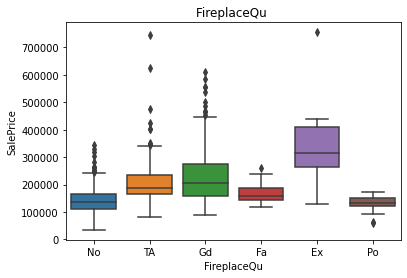

In [24]:
df_house_clean['FireplaceQu'] = df_house_clean['FireplaceQu'].fillna('No')
plt.title('FireplaceQu ')
sns.boxplot(x='FireplaceQu', y='SalePrice', data=df_house_clean[:TRAIN_ELEMENTS_INDEX:])

In [25]:
df_house_clean['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.,  26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,
        22., 123., 195., 155., 126., 200., 131., 133.])

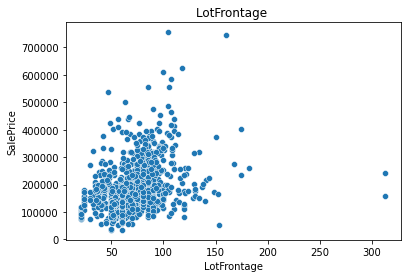

In [26]:
plt.title('LotFrontage ')
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df_house_clean[:TRAIN_ELEMENTS_INDEX:])

In [27]:
df_house_clean.drop(['LotFrontage'], axis=1, inplace=True)

In [28]:
df_house_clean.isna().sum().sort_values(ascending=False).head(15)

SalePrice       1459
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
dtype: int64

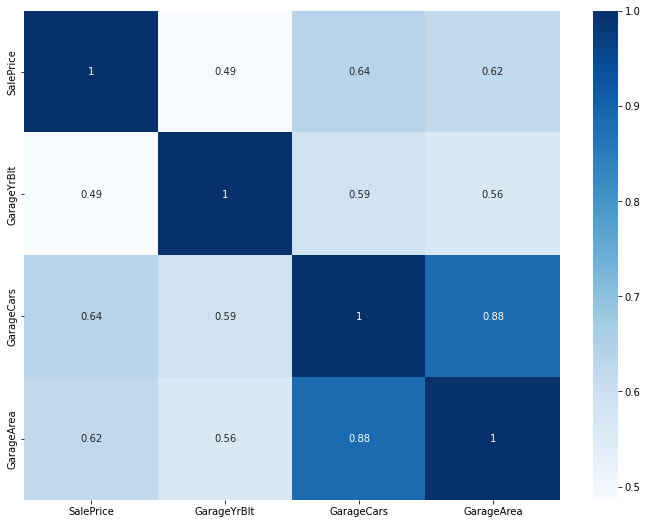

In [29]:
#saleprice correlation matrix with Garage Variables. 
cols = ['SalePrice','GarageType', 'GarageYrBlt', 'GarageCond', 
       'GarageFinish', 'GarageQual', 'GarageCars', 'GarageArea']

corrmat = df_house_clean[:TRAIN_ELEMENTS_INDEX:][cols].corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, cmap="Blues");

In [30]:
#Delete the columns
df_house_clean.drop(['GarageYrBlt', 'GarageArea'], axis=1, inplace=True)


#Fill the column
df_house_clean = df_house_clean.fillna(df_house_clean.mode().iloc[0])

In [31]:
df_house_clean.isna().sum().sort_values(ascending=False).head(15)

MSSubClass      0
HalfBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
GarageType      0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

In [32]:
#obtain all the numeric columns 
numeric_columns = list(df_house_clean.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)
numeric_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [33]:
skew_features = df_house_clean.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).apply(lambda x: skew(x)).sort_values(ascending=False)

In [34]:
high_skew = skew_features[skew_features > 0.5]

#in skew_index we store the name of the columns
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))

#Store the skews colums in a DataFrame
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 26 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
dtype: float64

In [35]:
for col in skew_index: 
    if (col != 'SalePrice'):
        df_house_clean[col] = boxcox1p(df_house_clean[col], 
                                   boxcox_normmax(df_house_clean[col]+1))
    

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [36]:
df_house_clean.loc[:, df_house_clean.dtypes == object]

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,No,Attchd,Unf,TA,TA,Y,WD,Normal
2915,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,No,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,No,Attchd,Unf,TA,TA,Y,WD,Normal


In [37]:
object_columns = list(df_house_clean.select_dtypes(['object']).columns)
object_columns

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [38]:
df_housing['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [39]:
ls = pd.get_dummies(df_house_clean['LotShape'], prefix='LotShape')
ls

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
2914,0,0,0,1
2915,0,0,0,1
2916,0,0,0,1
2917,0,0,0,1


In [40]:
df_house_clean.shape

(2919, 71)

In [41]:
#Copy the dataframe. 
df_house_cc = df_house_clean.copy(deep = True)

#Create the dummies for each column in the list of Obcjet columns
for obj_col in object_columns: 
    #print(obj_col)
    col_dum = pd.get_dummies(df_house_clean[obj_col], prefix=obj_col)
    df_house_cc = pd.concat ([df_house_cc,  col_dum], axis=1)
    
    #remove the original columns from the new dataframe
    df_house_cc.drop(obj_col, axis=1, inplace=True)

In [42]:
df_house_cc.shape

(2919, 270)

In [43]:
df_house_cc.isna().sum().sort_values(ascending=False).head(5)

MSSubClass          0
BsmtExposure_No     0
Foundation_Slab     0
Foundation_Stone    0
Foundation_Wood     0
dtype: int64

In [44]:
#Create a duplicate of the dataframe witout the Data Scaled. 
df_not_scaled = df_house_cc.copy(deep = True)

df_not_scaled.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N

In [45]:
#We can add this line to the import Libraries section. 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

scaler = StandardScaler()

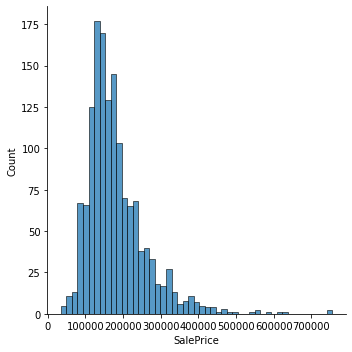

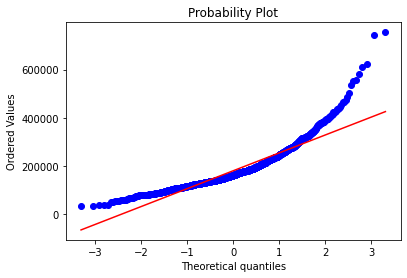

In [46]:
sns.displot(df_house_cc[:TRAIN_ELEMENTS_INDEX:]['SalePrice']);
fig = plt.figure()
res = stats.probplot(df_house_cc[:TRAIN_ELEMENTS_INDEX:]['SalePrice'], plot=plt)

In [47]:
#applying log transformation
df_house_cc['SalePrice'] = np.log(df_house_cc['SalePrice'])

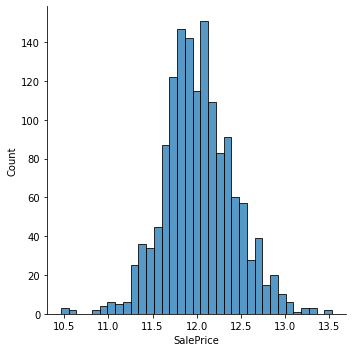

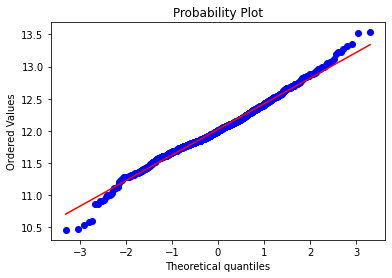

In [48]:
sns.displot(df_house_cc[:TRAIN_ELEMENTS_INDEX:]['SalePrice']);
fig = plt.figure()
res = stats.probplot(df_house_cc[:TRAIN_ELEMENTS_INDEX:]['SalePrice'], plot=plt)

In [49]:
#We need to decide wich columns we want to scalate
#all of them with and std greater than 1 
LIMIT_TO_SCALE = 1
columns_to_scale = df_house_cc.columns.where(df_house_cc.std()  > 1)

df_to_scale = pd.DataFrame()

#We have all the columns in columns_to_scale
#we can copy each column in a new dataframe. 
for col_to_scale in columns_to_scale.dropna():
    df_to_scale[col_to_scale] = df_house_cc[col_to_scale]
    df_house_cc.drop(col_to_scale, axis=1, inplace=True)

In [50]:
df_house_cc.shape, df_to_scale.shape

((2919, 252), (2919, 18))

In [51]:
#Let's see the data in df_to_scale befote to scale. 
df_to_scale.head(5)

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,6.502440,13.424520,7,2003,2003,19.378557,117.855863,0.0,30.016555,296.832338,1019.540733,0.000000,12.009558,0.000000,0.0,0.0,2,2008
1,4.250991,13.694527,6,1976,1976,0.000000,146.805798,0.0,44.178889,407.302427,0.000000,56.339208,0.000000,0.000000,0.0,0.0,5,2007
2,6.502440,14.034133,7,2001,2002,17.721069,91.575284,0.0,56.957796,314.805067,1034.306417,0.000000,9.849185,0.000000,0.0,0.0,9,2008
3,6.865584,13.683421,7,1915,1970,0.000000,52.776367,0.0,64.881737,268.234296,899.200533,0.000000,8.921746,16.012025,0.0,0.0,2,2006
4,6.502440,14.550142,8,2000,2000,25.323127,112.040325,0.0,61.233859,376.259375,1265.167706,42.351292,14.180238,0.000000,0.0,0.0,12,2008


In [52]:
#Create the Scaler
scaler = StandardScaler()

#Fit the Scaler with the data. 
df_to_scale_tmp = scaler.fit_transform(df_to_scale)

#Convert to dataframe the value returned by fit_transfom function. 
df_to_scale = pd.DataFrame(df_to_scale_tmp, columns=df_to_scale.columns)

In [53]:
#After scale. 
df_to_scale.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,0.349814,-0.125272,0.646183,1.046258,0.896833,1.032444,0.724690,-0.357352,-0.921053,-0.402368,1.202038,-0.85144,0.606786,-0.417108,-0.30343,-0.189069,-1.552184,0.157646
1,-1.079298,0.127070,-0.063185,0.154764,-0.395604,-0.733681,1.183898,-0.357352,-0.488310,0.507592,-0.780730,1.57340,-0.964794,-0.417108,-0.30343,-0.189069,-0.446925,-0.602962
2,0.349814,0.444457,0.646183,0.980221,0.848965,0.881384,0.307824,-0.357352,-0.097839,-0.254324,1.230754,-0.85144,0.324078,-0.417108,-0.30343,-0.189069,1.026753,0.157646
3,0.580320,0.116691,0.646183,-1.859351,-0.682812,-0.733681,-0.307610,-0.357352,0.144284,-0.637935,0.968004,-0.85144,0.202713,3.129000,-0.30343,-0.189069,-1.552184,-1.363569
4,0.349814,0.926706,1.355551,0.947203,0.753229,1.574221,0.632444,-0.357352,0.032820,0.251886,1.679725,0.97136,0.890842,-0.417108,-0.30343,-0.189069,2.132012,0.157646


In [54]:
#Replace the values not scaled by the scaled versión. 
for col_to_scale in columns_to_scale.dropna():
    df_house_cc[col_to_scale] = df_to_scale[col_to_scale]

In [55]:
df_house_cc.shape

(2919, 270)

In [56]:
#Lets see the data scaled jointly with all the other fields. 
df_house_cc.head(5)

,OverallCond,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjL

In [57]:
list_columns_ordered = df_house_cc.corr()['SalePrice'].sort_values(ascending=False).index
n=0

#I create a new DataFrame to contain only the columns that are correlated. 
df_correlated_columns = pd.DataFrame()
#Minimun correlation that we want. 
MIN_CORR = 0.4
for col in df_house_cc[:TRAIN_ELEMENTS_INDEX:].corr()['SalePrice'].sort_values(ascending=False):
    if (col > MIN_CORR or col < MIN_CORR * -1):
        print (list_columns_ordered[n])
        print (col)
        df_correlated_columns[list_columns_ordered[n]] = df_house_cc[list_columns_ordered[n]]
    
    n = n+1

SalePrice
1.0
OverallQual
0.817220700973612
GrLivArea
0.7302498257859353
GarageCars
0.6806768985069687
TotalBsmtSF
0.6153807828055382
1stFlrSF
0.608338889749126
FullBath
0.5947886534000912
YearBuilt
0.586554172575886
TotRmsAbvGrd
0.5656033406785919
YearRemodAdd
0.5400138225078915
Foundation_PConc
0.5308143681658325
ExterQual_Gd
0.5103364866029078
Fireplaces
0.49672899322758385
HeatingQC_Ex
0.46667231887823474
MasVnrArea
0.46395675039859374
BsmtQual_Ex
0.440704950701307
BsmtFinType1_GLQ
0.4383941459325458
LotArea
0.4270257618561195
OpenPorchSF
0.4197204603522652
KitchenQual_Gd
0.41390298501459977
GarageFinish_Fin
0.40653587220248893
KitchenQual_Ex
0.4003477931365159
FireplaceQu_No
-0.5100150339396856
BsmtQual_TA
-0.5382276876879853
KitchenQual_TA
-0.5383930701261412
GarageFinish_Unf
-0.5749439494912291
ExterQual_TA
-0.5965038565865083


In [58]:
df_correlated_columns.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,Foundation_PConc,ExterQual_Gd,Fireplaces,HeatingQC_Ex,MasVnrArea,BsmtQual_Ex,BsmtFinType1_GLQ,LotArea,OpenPorchSF,KitchenQual_Gd,GarageFinish_Fin,KitchenQual_Ex,FireplaceQu_No,BsmtQual_TA,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,12.247694,0.646183,7.234115,2.0,-0.402368,5.318379,2,1.046258,2.238463,0.896833,1,1,0.000000,1,1.032444,0,1,-0.125272,0.606786,1,0,0,1,0,0,0,0
1,12.109011,-0.063185,6.947212,2.0,0.507592,5.550627,2,0.154764,1.978208,-0.395604,0,0,0.900816,1,-0.733681,0,0,0.127070,-0.964794,0,0,0,0,0,1,0,1
2,12.317167,0.646183,7.275132,2.0,-0.254324,5.362015,2,0.980221,1.978208,0.848965,1,1,0.900816,1,0.881384,0,1,0.444457,0.324078,1,0,0,0,0,0,0,0
3,11.849398,0.646183,7.237969,3.0,-0.637935,5.388291,1,-1.859351,2.116352,-0.682812,0,0,0.900816,0,-0.733681,0,0,0.116691,0.202713,1,0,0,0,1,0,1,1
4,12.429216,1.355551,7.470741,3.0,0.251886,5.493032,2,0.947203,2.347900,0.753229,1,1,0.900816,1,1.574221,0,1,0.926706,0.890842,1,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split

#Split the data only correlated columns. 
y = df_correlated_columns[:TRAIN_ELEMENTS_INDEX:]['SalePrice']
X = df_correlated_columns[:TRAIN_ELEMENTS_INDEX:].drop(['SalePrice'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df_correlated_columns.loc[TRAIN_ELEMENTS_INDEX + 1:, :].reset_index(drop=True).copy()
X_test.drop('SalePrice', axis=1, inplace=True)


#Split data with all transformations and all columns. 
y_cc = df_house_cc[:TRAIN_ELEMENTS_INDEX:]['SalePrice']
X_cc = df_house_cc[:TRAIN_ELEMENTS_INDEX:].drop(['SalePrice'], axis=1)
X_cc_train, X_cc_val, y_cc_train, y_cc_val = train_test_split(X_cc, y_cc, test_size=0.2, random_state=42)
X_cc_test = df_house_cc.loc[TRAIN_ELEMENTS_INDEX + 1:, :].reset_index(drop=True).copy()
X_cc_test.drop('SalePrice', axis=1, inplace=True)

In [60]:
X_cc_test.shape

(1459, 269)

In [61]:
def evaluate_regression(y_true, y_preds):
    from sklearn.metrics import r2_score
    """
    Evaluar modelo de regresion
    """
    r2_score = r2_score(y_true, y_preds)
    rmse=np.sqrt(mean_squared_error(y_true,y_preds))
    mae=mean_absolute_error(y_true, y_preds)

    print(f"KPIs-------------------------------------")
    print(f"r2: {r2_score * 100:.2f}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"KPIs-------------------------------------")
    return 

In [62]:
from sklearn import linear_model
#from sklearn import 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [63]:
def train_eval_ridge(X_train, y_train, X_val, y_val):  
    model = linear_model.Ridge()
    model.fit(X_train, y_train)
    print(model.score(X_val, y_val))
    y_preds = model.predict(X_val)
    evaluate_regression(y_val, y_preds)
    return model 

In [64]:
model1 = train_eval_ridge(X_train, y_train, X_val, y_val)

0.8774636077607247
KPIs-------------------------------------
r2: 87.75
RMSE: 0.1431799277673265
MAE: 0.10007283040803416
KPIs-------------------------------------


In [65]:
model2 = train_eval_ridge(X_cc_train, y_cc_train, X_cc_val, y_cc_val)

0.9170118493863653
KPIs-------------------------------------
r2: 91.70
RMSE: 0.11783047745120485
MAE: 0.08232651990609466
KPIs-------------------------------------


In [66]:
#test_features = df_test_cc[:]
#print (test_features)
results1 = model1.predict(X_test)
results2 = model2.predict(X_cc_test)

In [67]:
submission = pd.DataFrame()

submission['Id'] = df_test['Id']
submission['SalePrice'] = np.exp(results2)


submission.to_csv('./submission.csv', index=False, header=True)

In [68]:
submission

,Id,SalePrice
0,1461,116983.421767
1,1462,156369.571296
2,1463,181913.199130
3,1464,193564.300619
4,1465,198325.400385
...,...,...
1454,2915,86731.746993
1455,2916,83108.707425
1456,2917,167457.607608
1457,2918,124019.374801
